# Testing SMGA strategies

## Importing modules

In [1]:
import sys
sys.path.append('../src')

from data_loader import load_sector_data, get_seasonal_returns, calculate_sector_ratio

from timeseries_analysis import *
from stats_analysis import calculate_statistics, seasonal_ttest
from visualization import plot_seasonal_comparison, plot_monthly_averages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

print("✓ Setup complete!")

✓ Setup complete!


## load the data

In [2]:
# Load the data
file_path = '../data/Seasonal S&P Data as of 11.13.2025 - Abhi.xlsx'

df_sp500 = load_sector_data(file_path, 'S&P500')
df_rf = load_sector_data(file_path, 'RF')
df_cyclical = load_sector_data(file_path, 'Discretionary')
df_defense = load_sector_data(file_path, 'Staples')

print("SP 500 data:")
print(f"  Years: {df_sp500.index.min()} - {df_sp500.index.max()}")
print(f"  Shape: {df_sp500.shape}")

print("\nRF data:")
print(f"  Years: {df_rf.index.min()} - {df_rf.index.max()}")
print(f"  Shape: {df_rf.shape}")

print("\nFirst few rows of S&P500:")
print(df_sp500.head())

SP 500 data:
  Years: 1970 - 2025
  Shape: (56, 12)

RF data:
  Years: 1970 - 2025
  Shape: (56, 12)

First few rows of S&P500:
        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug     Sep    Oct  \
Year                                                                          
1970 -7.647  5.269  0.145 -9.048 -6.097 -5.003  7.329  4.446   3.300 -1.140   
1971  4.048  0.907  3.680  3.629 -4.156  0.070 -4.132  3.610  -0.697 -4.179   
1972  1.812  2.165  0.591  0.438  1.728 -2.182  0.233  3.445  -0.486  0.932   
1973 -1.711 -3.749 -0.143 -4.080 -1.888 -0.657  3.798 -3.668   4.010 -0.129   
1974 -1.005 -0.362 -2.328 -3.905 -3.355 -1.467 -7.779 -9.028 -11.933 16.305   

         Nov    Dec  
Year                 
1970   4.745  5.677  
1971  -0.255  8.618  
1972   4.562  1.183  
1973 -11.386  1.657  
1974  -5.318 -2.015  


## Calculate S&P 500 excess returns 

In [3]:
sp500_returns = calculate_sp500_returns_ts(df_sp500, df_rf)
print(f"S&P 500 excess returns calculated")
print(f"Total observations: {len(sp500_returns)}")
print(f"Date range: {sp500_returns.index.min()} to {sp500_returns.index.max()}")
print("\nFirst 10 observations:")
sp500_returns.head(5)

S&P 500 excess returns calculated
Total observations: 670
Date range: 1970-01-01 00:00:00 to 2025-10-01 00:00:00

First 10 observations:


,rf,gross,excess
1970-01-01,0.600,-7.647,-8.247
1970-02-01,0.620,5.269,4.649
1970-03-01,0.570,0.145,-0.425
1970-04-01,0.500,-9.048,-9.548
1970-05-01,0.530,-6.097,-6.627


## Calculate SMGA returns strategy

In [4]:
smga_returns = calculate_smga_returns_ts(df_sp500, df_rf)

print(f"SMGA excess returns calculated")
print(f"Total observations: {len(smga_returns)}")
print(f"Date range: {smga_returns.index.min()} to {smga_returns.index.max()}")
print("\nFirst 15 observations (showing seasonal pattern):")
smga_returns.head(10)

SMGA excess returns calculated
Total observations: 670
Date range: 1970-01-01 00:00:00 to 2025-10-01 00:00:00

First 15 observations (showing seasonal pattern):


,rf,gross,excess
1970-01-01,0.600,-7.647,-8.247
1970-02-01,0.620,5.269,4.649
1970-03-01,0.570,0.145,-0.425
1970-04-01,0.500,-9.048,-9.548
1970-05-01,0.530,0.530,0.000
1970-06-01,0.580,0.580,0.000
1970-07-01,0.520,0.520,0.000
1970-08-01,0.530,0.530,0.000
1970-09-01,0.540,0.540,0.000
1970-10-01,0.460,0.460,0.000


## Calculate sector rotation strategy

In [5]:
rotation_returns = calculate_sector_rotation_returns_ts(df_cyclical, df_defense, df_rf)

print(f"Sector rotation returns calculated")
print(f"Total observations: {len(rotation_returns)}")
print(f"Date range: {rotation_returns.index.min()} to {rotation_returns.index.max()}")
print("\nFirst 15 observations (showing seasonal pattern):")
rotation_returns.head(15)

Sector rotation returns calculated
Total observations: 433
Date range: 1989-10-01 00:00:00 to 2025-10-01 00:00:00

First 15 observations (showing seasonal pattern):


,rf,gross,excess
1989-10-01,0.680,0.373,-0.307
1989-11-01,0.690,-0.699,-1.389
1989-12-01,0.610,-0.694,-1.304
1990-01-01,0.570,-6.667,-7.237
1990-02-01,0.570,1.836,1.266
1990-03-01,0.640,2.956,2.316
1990-04-01,0.690,-3.738,-4.428
1990-05-01,0.680,10.223,9.543
1990-06-01,0.630,3.627,2.997
1990-07-01,0.680,1.004,0.324


## sample_year = 2005  # Change this to any year you want to inspect

In [6]:
sample_year = 2005
# Filter to the sample year
sp500_year = sp500_returns[sp500_returns.index.year == sample_year]
smga_year = smga_returns[smga_returns.index.year == sample_year]

sample_comparison = pd.DataFrame({
    'Date': sp500_year.index,
    'Month': sp500_year.index.month,
    'SP500_Gross': sp500_year['gross'].values,
    'SP500_Excess': sp500_year['excess'].values,
    'SMGA_Gross': smga_year['gross'].values,
    'SMGA_Excess': smga_year['excess'].values,
    'RF': smga_year['rf'].values
})

print(f"Comparing S&P 500 vs SMGA for year {sample_year}:")
print("Notice: SMGA = 0 for May-Oct (months 5-10), equals S&P 500 for Nov-Apr")
sample_comparison

Comparing S&P 500 vs SMGA for year 2005:
Notice: SMGA = 0 for May-Oct (months 5-10), equals S&P 500 for Nov-Apr


,Date,Month,SP500_Gross,SP500_Excess,SMGA_Gross,SMGA_Excess,RF
0,2005-01-01,1,-2.529,-2.689,-2.529,-2.689,0.160
1,2005-02-01,2,1.890,1.730,1.890,1.730,0.160
2,2005-03-01,3,-1.912,-2.122,-1.912,-2.122,0.210
3,2005-04-01,4,-2.011,-2.221,-2.011,-2.221,0.210
4,2005-05-01,5,2.995,2.755,0.240,0.000,0.240
5,2005-06-01,6,-0.014,-0.244,0.230,0.000,0.230
6,2005-07-01,7,3.597,3.357,0.240,0.000,0.240
7,2005-08-01,8,-1.122,-1.422,0.300,0.000,0.300
8,2005-09-01,9,0.695,0.405,0.290,0.000,0.290
9,2005-10-01,10,-1.774,-2.044,0.270,0.000,0.270


## Calculate statistics for period 1993 -2025

In [ ]:
sp500_p = filter_period(sp500_returns, start_year=1993, end_year=2023)
smga_p = filter_period(smga_returns, start_year=1993, end_year=2023)
off_def_p = filter_period(rotation_returns, start_year=1993, end_year=2023)

stats_sp500_full = calculate_statistics_ts(sp500_p, 'S&P 500')
stats_smga_full = calculate_statistics_ts(smga_p, 'SMGA')
stats_off_def_full = calculate_statistics_ts(off_def_p, 'Offense Defense')

summary_full = pd.DataFrame([stats_sp500_full, stats_smga_full, stats_off_def_full]).set_index('Strategy')

print("="*80)
print("FULL PERIOD STATISTICS")
print("="*80)
print(summary_full)

print("\n" + "="*80)
print("COMPARISON TO PAPER (Table 2, 1993-2023)")
print("="*80)
print("Paper's S&P 500: Mean=0.90%, Std=4.32%, Sharpe=0.21")
print("Paper's SMGA:    Mean=0.90%, Std=3.52%, Sharpe=0.26")


FULL PERIOD STATISTICS
                 Mean (%)  Median (%)  Std Dev (%)  Sharpe  Sortino    N  \
Strategy                                                                   
S&P 500             0.749       1.219        4.320   0.448    0.610  372   
SMGA                0.641       0.282        3.006   0.520    0.527  372   
Offense Defense     1.019       1.045        4.675   0.614    0.942  372   

                   Start      End  
Strategy                           
S&P 500          1993-01  2023-12  
SMGA             1993-01  2023-12  
Offense Defense  1993-01  2023-12  

COMPARISON TO PAPER (Table 2, 1993-2023)
Paper's S&P 500: Mean=0.90%, Std=4.32%, Sharpe=0.21
Paper's SMGA:    Mean=0.90%, Std=3.52%, Sharpe=0.26


## Returns berweens 1993 - 2007,  2009 - 2023

In [14]:
sp500_p1 = filter_period(sp500_returns, start_year=1993, end_year=2007)
smga_p1 = filter_period(smga_returns, start_year=1993, end_year=2007)
off_def_p1 = filter_period(rotation_returns, start_year=1993, end_year=2007)

print(f"Period 1 filtered: {len(sp500_p1)} observations")
print(f"Date range: {sp500_p1.index.min()} to {sp500_p1.index.max()}")

stats_sp500_p1 = calculate_statistics_ts(sp500_p1, 'S&P 500')
stats_smga_p1 = calculate_statistics_ts(smga_p1, 'SMGA')
stats_offdef_p1 = calculate_statistics_ts(off_def_p1, 'Offense Defense')

summary_p1 = pd.DataFrame([stats_sp500_p1, stats_smga_p1, stats_offdef_p1]).set_index('Strategy')

print("="*80)
print("PERIOD 1: 1993-2007 STATISTICS")
print("="*80)
print(summary_p1)

print("\n" + "="*80)
print("COMPARISON TO PAPER (Table 2, 1993-2007)")
print("="*80)
print("Paper's S&P 500: Mean=0.91%, Std=3.92%, Sharpe=0.23")
print("Paper's SMGA:    Mean=0.99%, Std=2.91%, Sharpe=0.34")

sp500_p2 = filter_period(sp500_returns, start_year=2009, end_year=2023)
smga_p2 = filter_period(smga_returns, start_year=2009, end_year=2023)
off_def_p2 = filter_period(rotation_returns, start_year=2009, end_year=2023)

print(f"Period 2 filtered: {len(sp500_p2)} observations")
print(f"Date range: {sp500_p2.index.min()} to {sp500_p2.index.max()}")

# %%
# Cell 10: Calculate statistics for Period 2 (2009-2023)
stats_sp500_p2 = calculate_statistics_ts(sp500_p2, 'S&P 500')
stats_smga_p2 = calculate_statistics_ts(smga_p2, 'SMGA')
stats_offdef_p2 = calculate_statistics_ts(off_def_p2, 'SMGA')

summary_p2 = pd.DataFrame([stats_sp500_p2, stats_smga_p2, stats_offdef_p2]).set_index('Strategy')
print("="*80)
print("PERIOD 2: 2009-2023 STATISTICS")
print("="*80)
print(summary_p2)

print("\n" + "="*80)
print("COMPARISON TO PAPER (Table 2, 2009-2023)")
print("="*80)
print("Paper's S&P 500: Mean=1.19%, Std=4.44%, Sharpe=0.27")
print("Paper's SMGA:    Mean=0.90%, Std=4.06%, Sharpe=0.22")

Period 1 filtered: 180 observations
Date range: 1993-01-01 00:00:00 to 2007-12-01 00:00:00
PERIOD 1: 1993-2007 STATISTICS
                 Mean (%)  Median (%)  Std Dev (%)  Sharpe  Sortino    N  \
Strategy                                                                   
S&P 500             0.751       1.180        3.919   0.382    0.540  180   
SMGA                0.668       0.403        2.690   0.451    0.562  180   
Offense Defense     1.033       1.106        4.420   0.561    0.890  180   

                   Start      End  
Strategy                           
S&P 500          1993-01  2007-12  
SMGA             1993-01  2007-12  
Offense Defense  1993-01  2007-12  

COMPARISON TO PAPER (Table 2, 1993-2007)
Paper's S&P 500: Mean=0.91%, Std=3.92%, Sharpe=0.23
Paper's SMGA:    Mean=0.99%, Std=2.91%, Sharpe=0.34
Period 2 filtered: 180 observations
Date range: 2009-01-01 00:00:00 to 2023-12-01 00:00:00
PERIOD 2: 2009-2023 STATISTICS
          Mean (%)  Median (%)  Std Dev (%)  Shar

## Plot returns

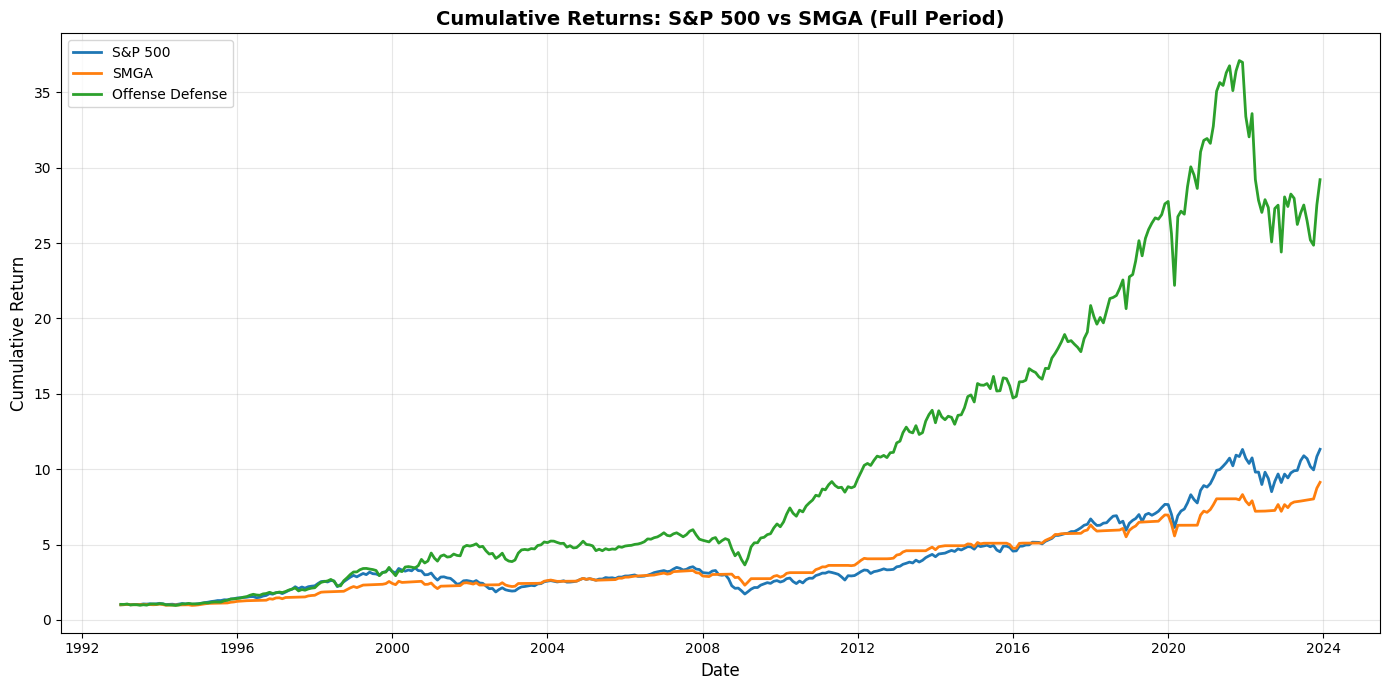

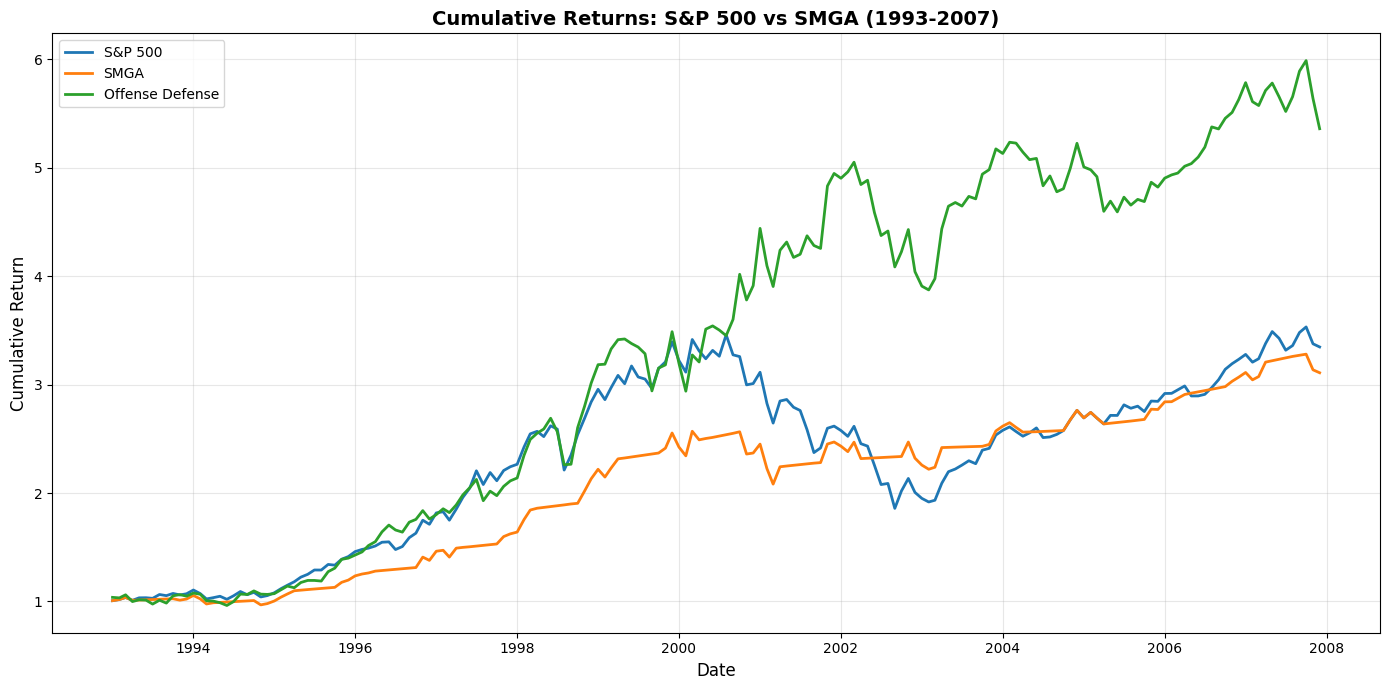

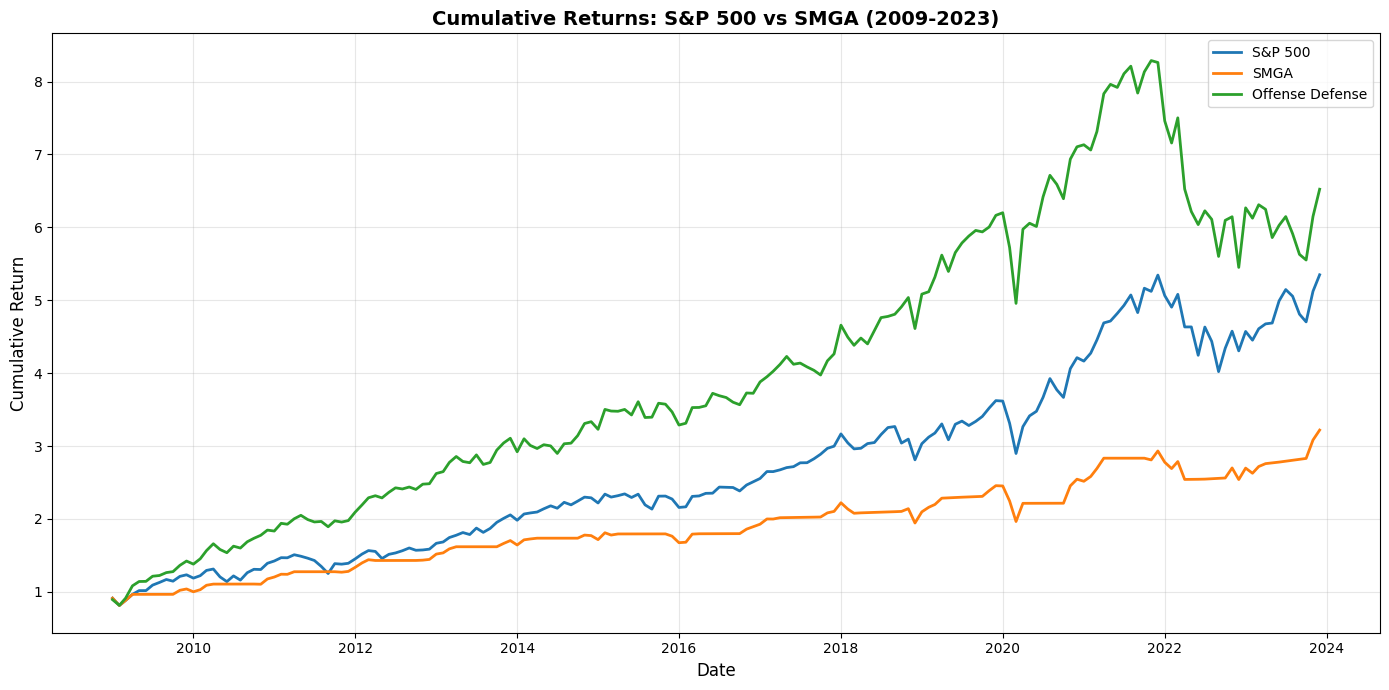

In [15]:
strategies_full = {
    'S&P 500': sp500_p["gross"],
    'SMGA': smga_p["gross"],
    'Offense Defense': off_def_p['gross'],
}

plot_cumulative_returns(strategies_full, title="Cumulative Returns: S&P 500 vs SMGA (Full Period)")

# %%
# Cell 13: Plot cumulative returns - Period 1 (1993-2007)
strategies_p1 = {
    'S&P 500': sp500_p1["gross"],
    'SMGA': smga_p1["gross"],
    'Offense Defense': off_def_p1['gross'],
}

plot_cumulative_returns(strategies_p1, title="Cumulative Returns: S&P 500 vs SMGA (1993-2007)")

# %%
# Cell 14: Plot cumulative returns - Period 2 (2009-2023)
strategies_p2 = {
    'S&P 500': sp500_p2["gross"],
    'SMGA': smga_p2["gross"],
    'Offense Defense': off_def_p2['gross'],
}

plot_cumulative_returns(strategies_p2, title="Cumulative Returns: S&P 500 vs SMGA (2009-2023)")

## More plots

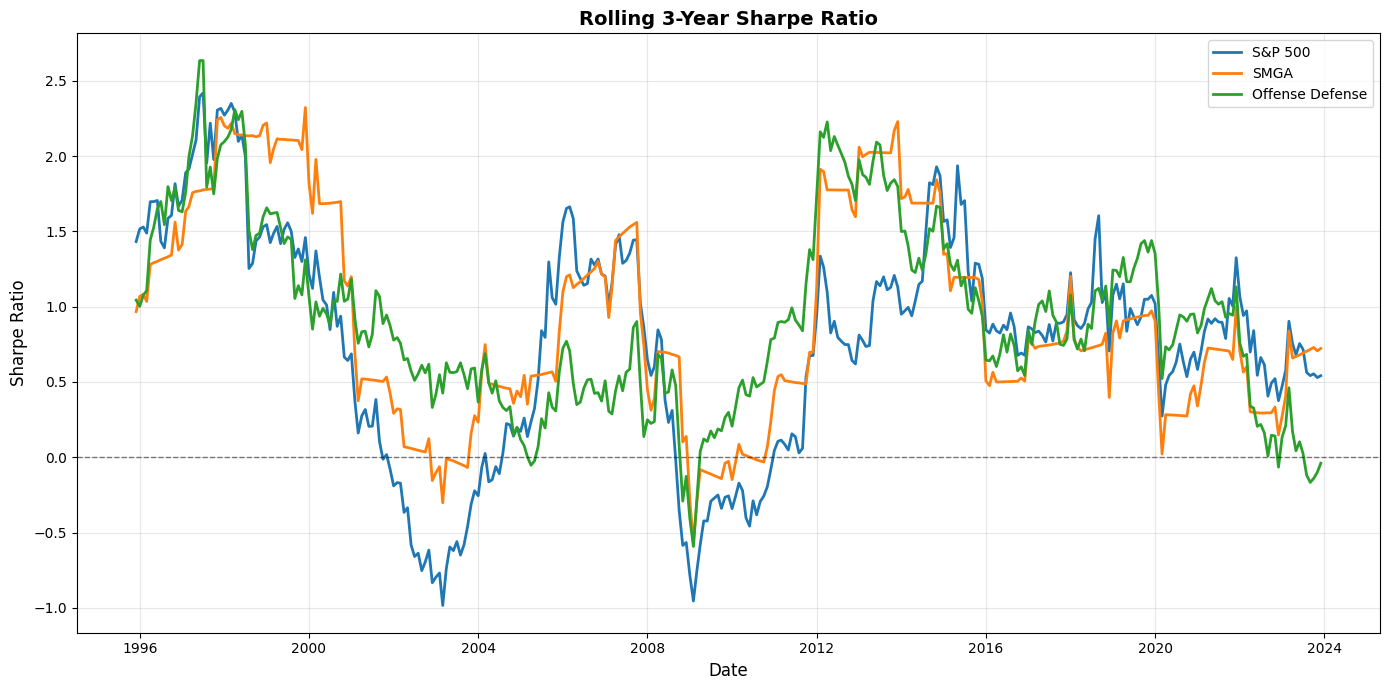

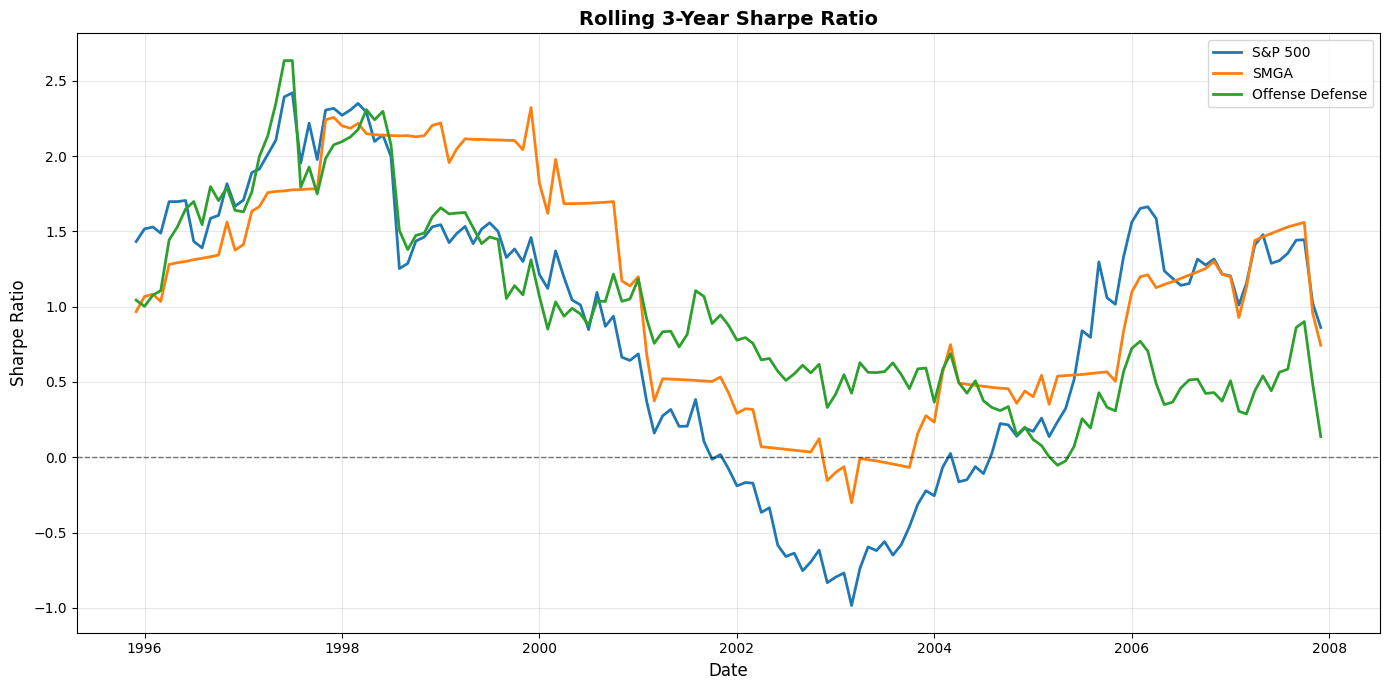

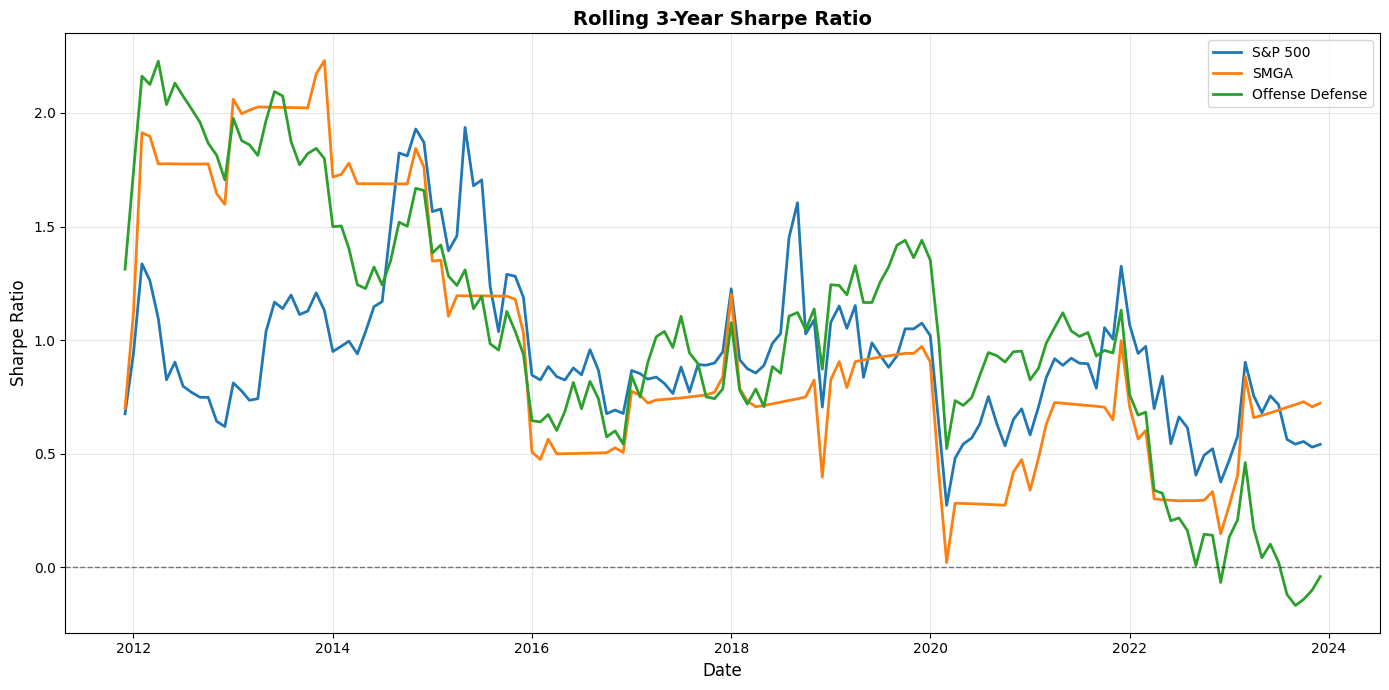

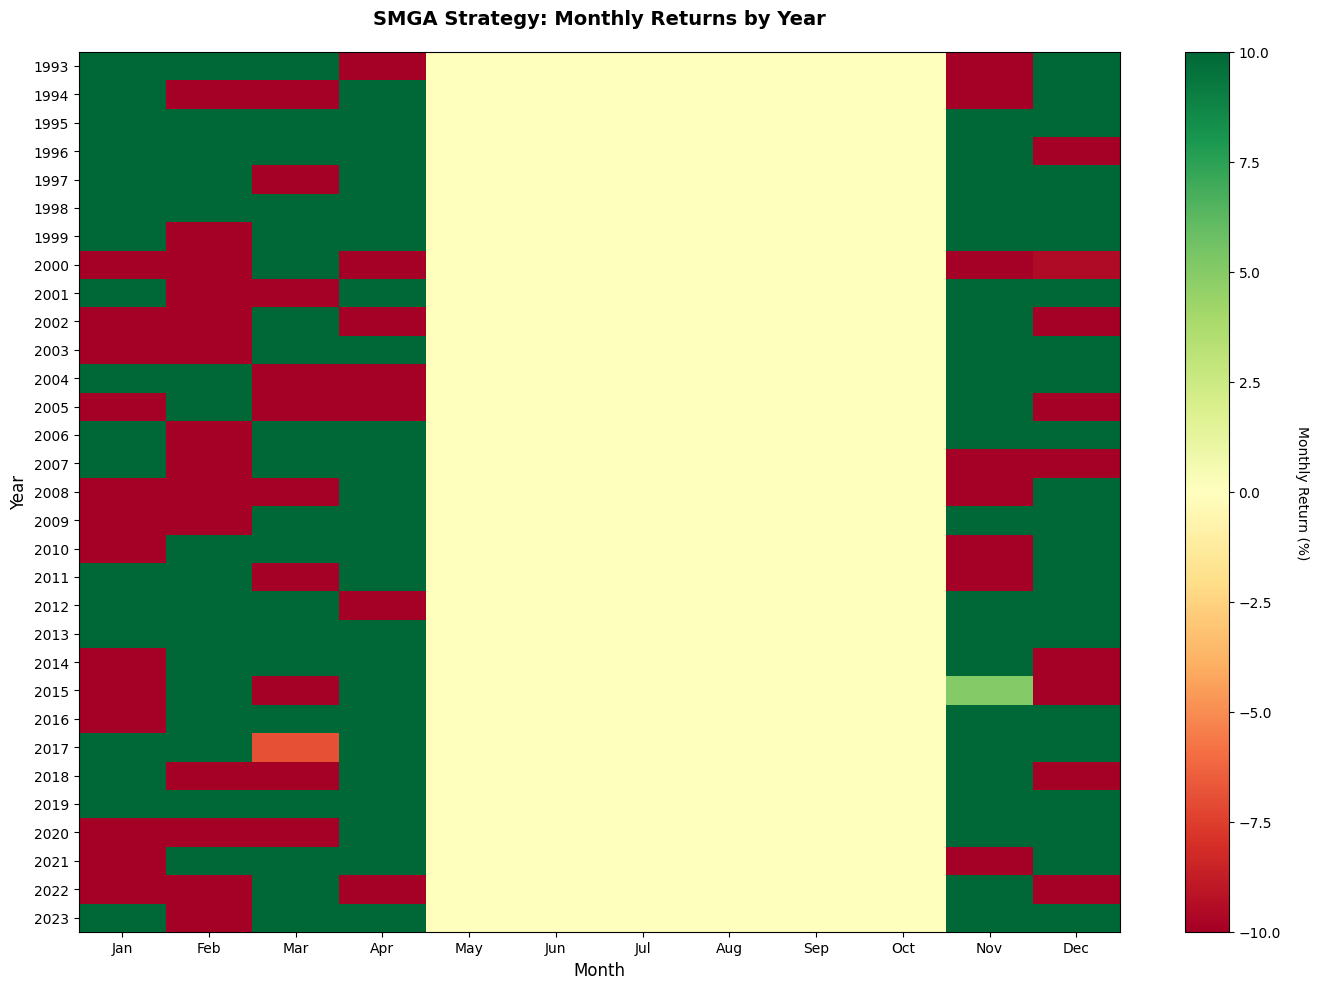

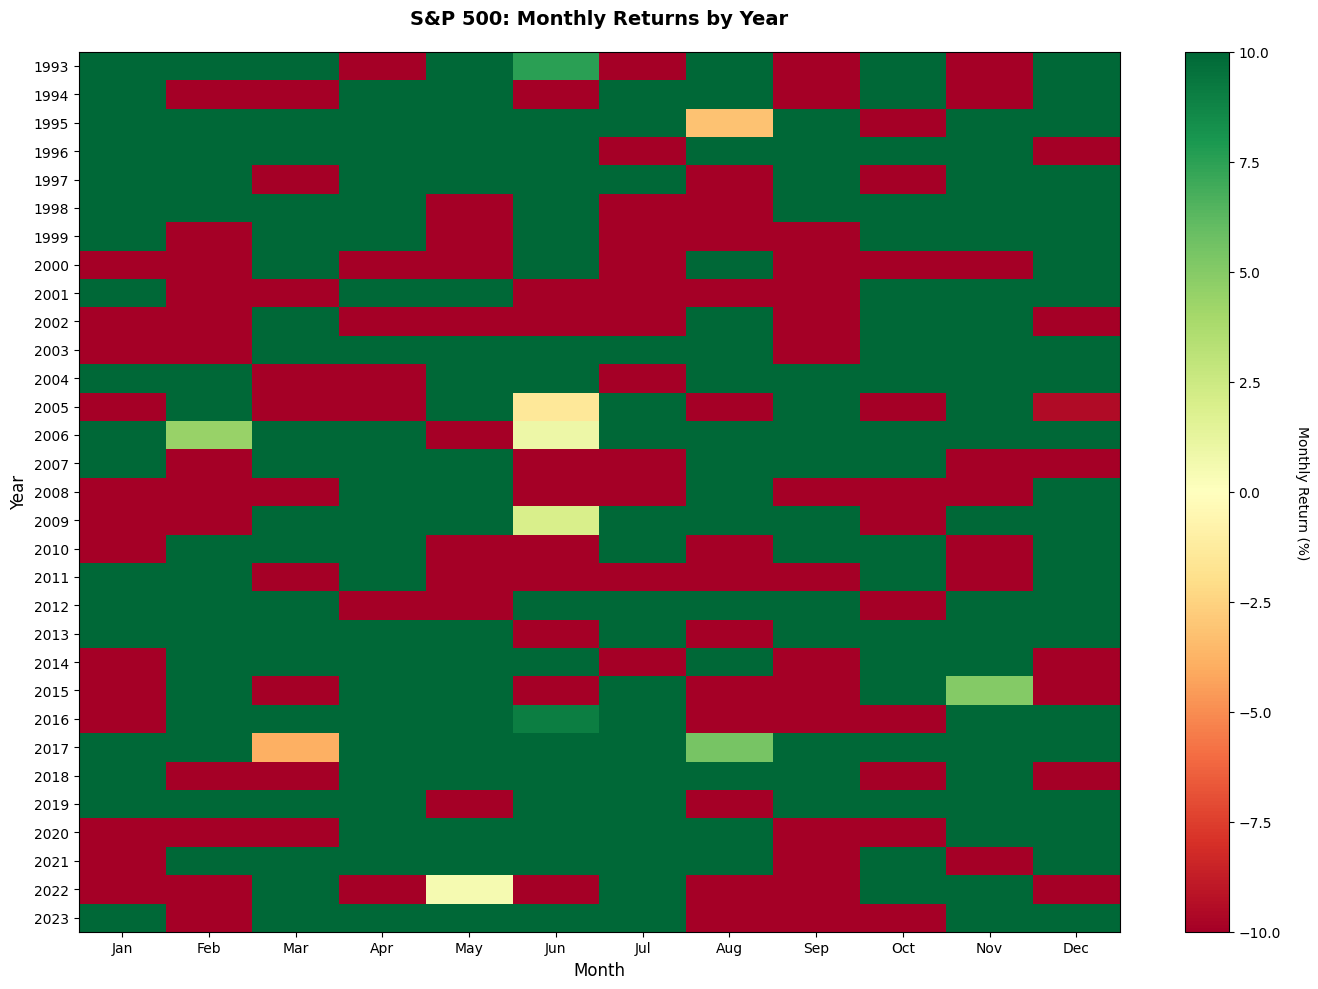

In [17]:
# Cell 15: Rolling 3-year Sharpe Ratio
plot_rolling_sharpe(strategies_full, window=36, title="Rolling 3-Year Sharpe Ratio")

# Cell 15: Rolling 3-year Sharpe Ratio
plot_rolling_sharpe(strategies_p1, window=36, title="Rolling 3-Year Sharpe Ratio")

# Cell 15: Rolling 3-year Sharpe Ratio
plot_rolling_sharpe(strategies_p2, window=36, title="Rolling 3-Year Sharpe Ratio")

# %%
# Cell 16: Monthly returns heatmap - SMGA strategy
plot_monthly_returns_heatmap(smga_p["excess"], title="SMGA Strategy: Monthly Returns by Year")

# %%
# Cell 17: Monthly returns heatmap - S&P 500 baseline
sp500_returns
plot_monthly_returns_heatmap(sp500_p["gross"], title="S&P 500: Monthly Returns by Year")

## Seasonal pattern anslysis

In [11]:
# Create month column for grouping
smga_by_month = smga_p['gross'].to_frame('return')
smga_by_month['month'] = smga_by_month.index.month

sp500_by_month = sp500_p['gross'].to_frame('return')
sp500_by_month['month'] = sp500_by_month.index.month

# Calculate average by month
smga_monthly_avg = smga_by_month.groupby('month')['return'].mean()
sp500_monthly_avg = sp500_by_month.groupby('month')['return'].mean()

seasonal_comparison = pd.DataFrame({
    'S&P 500': sp500_monthly_avg,
    'SMGA': smga_monthly_avg
})
seasonal_comparison.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("Average Monthly Returns (%) by Month:")
print(seasonal_comparison)

Average Monthly Returns (%) by Month:
    S&P 500   SMGA
Jan   0.470  0.470
Feb  -0.211 -0.211
Mar   1.149  1.149
Apr   1.893  1.893
May   0.554  0.192
Jun   0.124  0.184
Jul   1.336  0.191
Aug  -0.384  0.202
Sep  -0.815  0.199
Oct   1.634  0.193
Nov   2.186  2.186
Dec   1.048  1.048


## Seasonal comparison plot

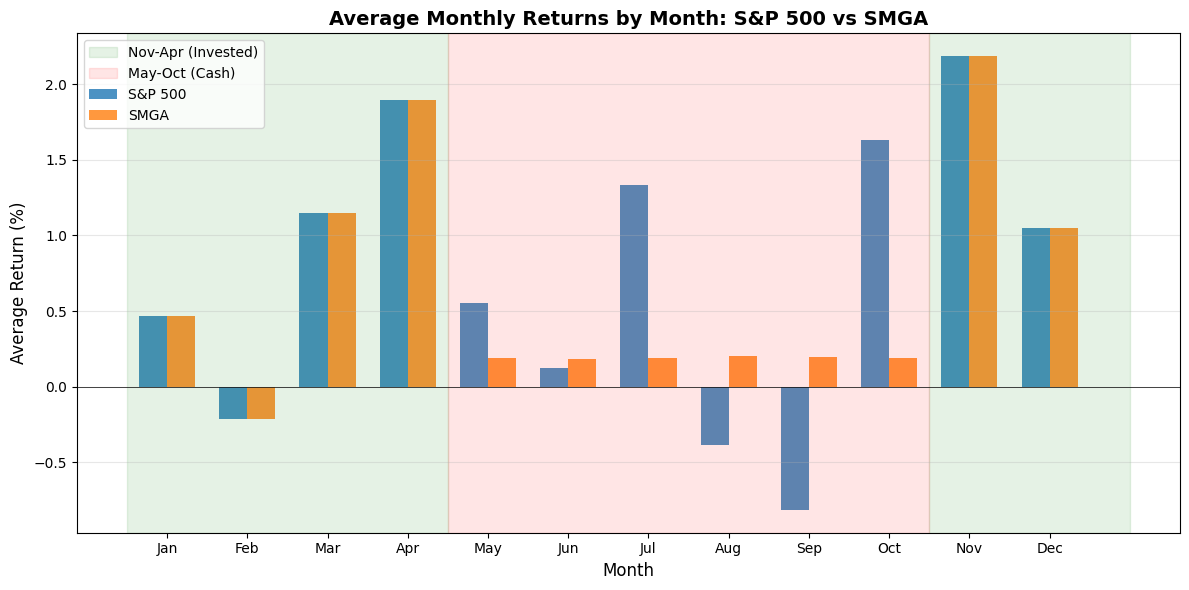

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(seasonal_comparison.index))
width = 0.35

ax.bar(x - width/2, seasonal_comparison['S&P 500'], width, label='S&P 500', alpha=0.8)
ax.bar(x + width/2, seasonal_comparison['SMGA'], width, label='SMGA', alpha=0.8)

# Highlight Nov-Apr period
ax.axvspan(9.5, 12, alpha=0.1, color='green', label='Nov-Apr (Invested)')
ax.axvspan(-0.5, 3.5, alpha=0.1, color='green')
ax.axvspan(3.5, 9.5, alpha=0.1, color='red', label='May-Oct (Cash)')

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average Return (%)', fontsize=12)
ax.set_title('Average Monthly Returns by Month: S&P 500 vs SMGA', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(seasonal_comparison.index)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()